<a href="https://colab.research.google.com/github/Vineethreddybala12/day4/blob/main/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
 [[78  1]
 [ 5 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

ROC-AUC Score: 0.9978175469227412


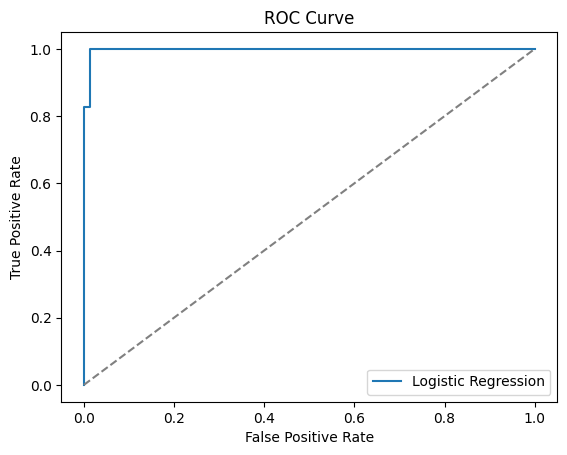

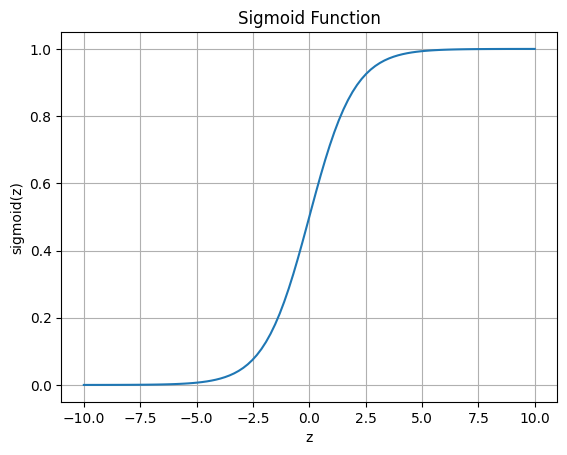

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

# Load Dataset
column_names = ['ID','Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df = pd.read_csv('/content/breast-cancer-wisconsin.data', names=column_names)

# Preprocessing
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)
df.drop('ID', axis=1, inplace=True)
df['Class'] = df['Class'].map({2: 0, 4: 1})  # 0 = benign, 1 = malignant

# Train-Test Split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

#Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Sigmoid Function Plot
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()